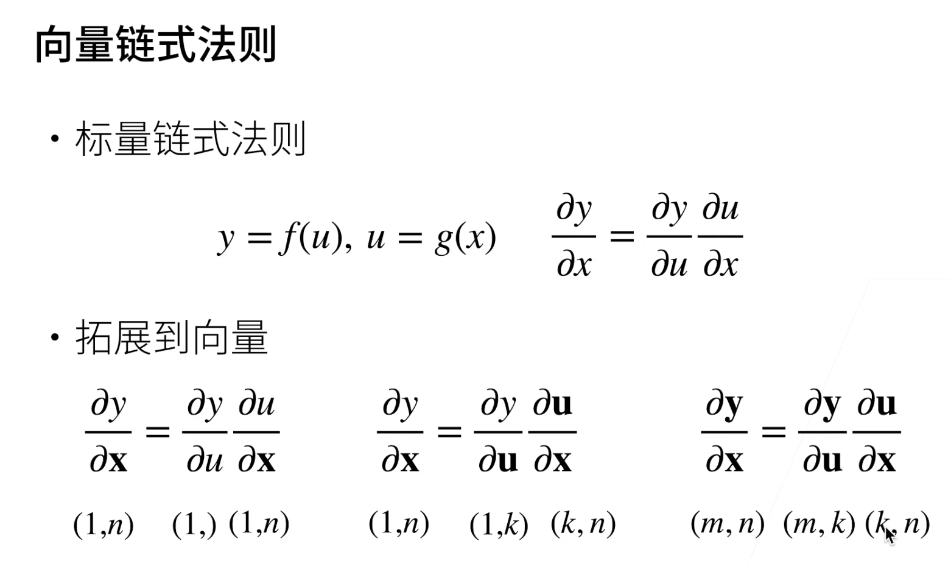

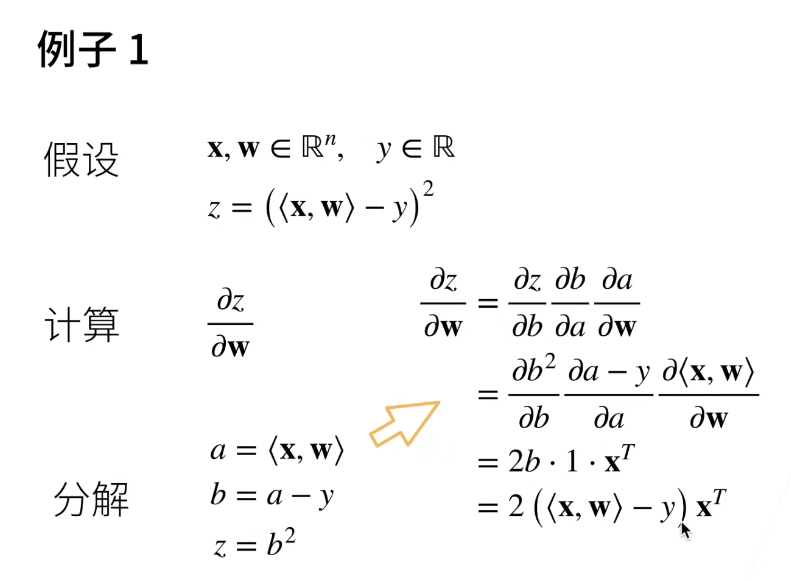

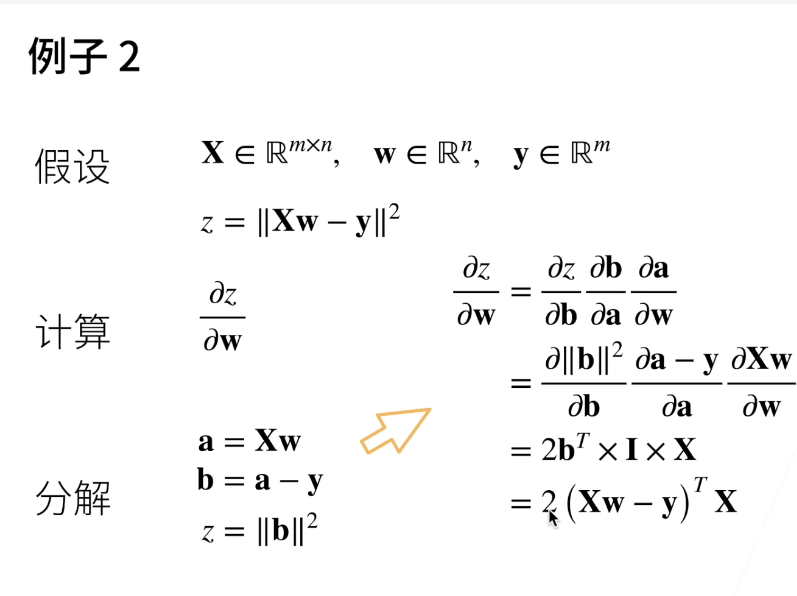

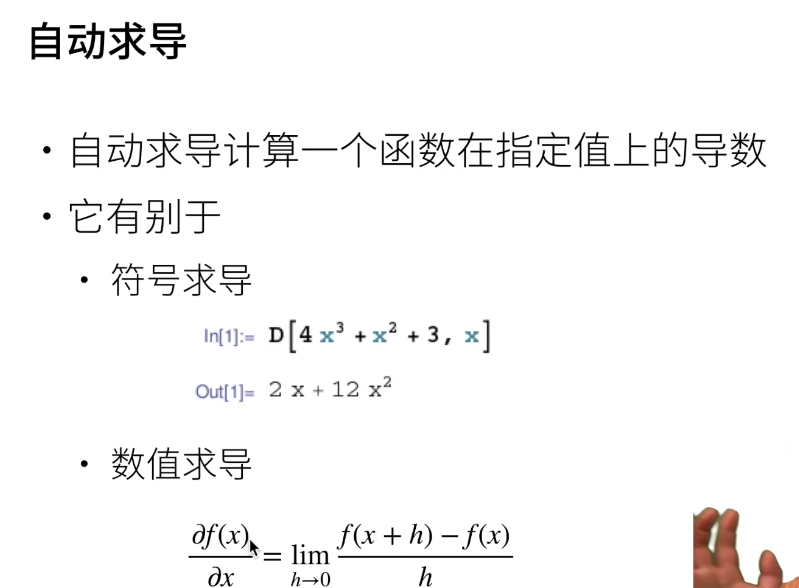
显示构造计算图
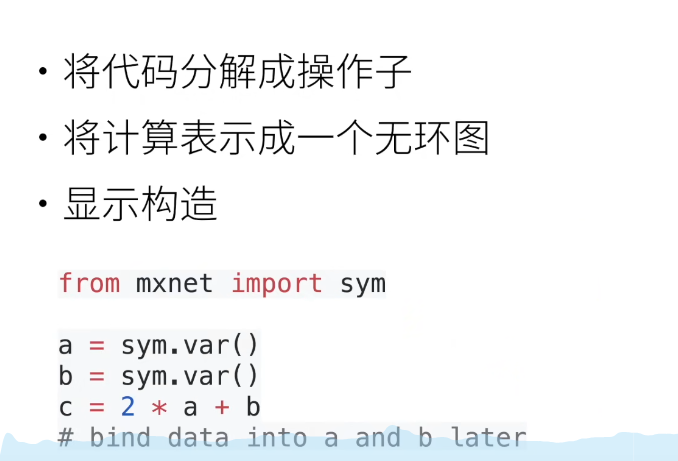
隐式构造计算图
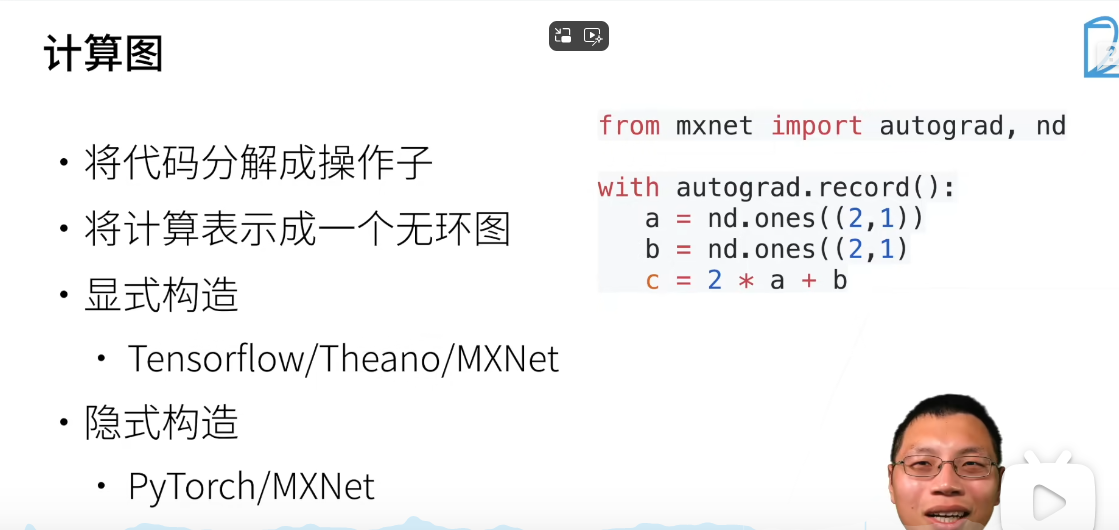

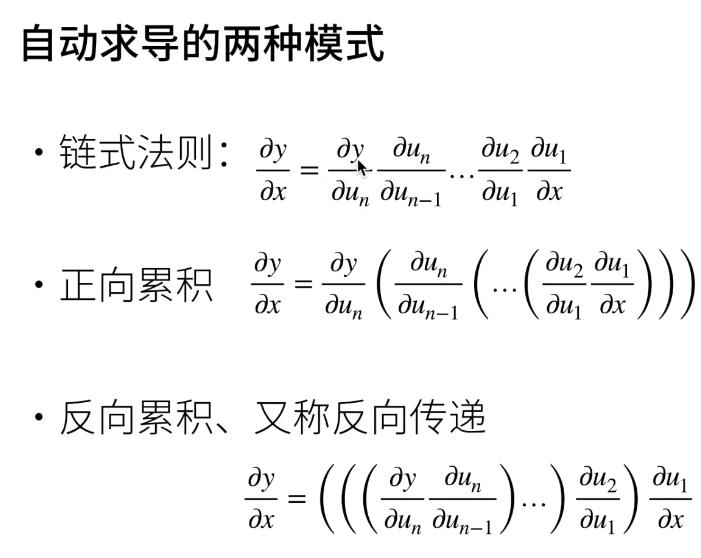

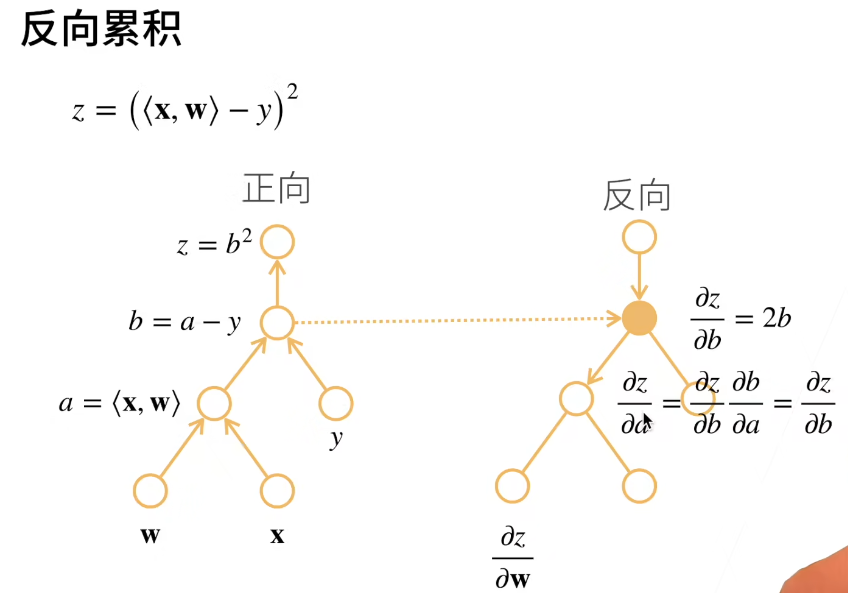

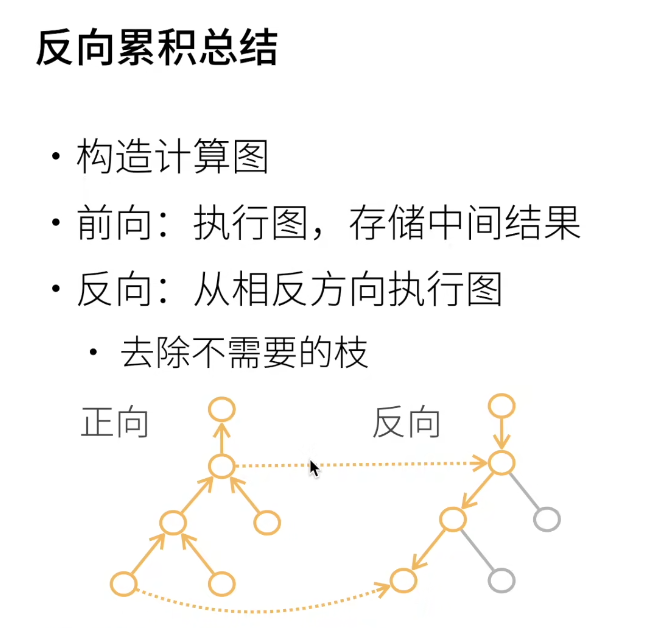

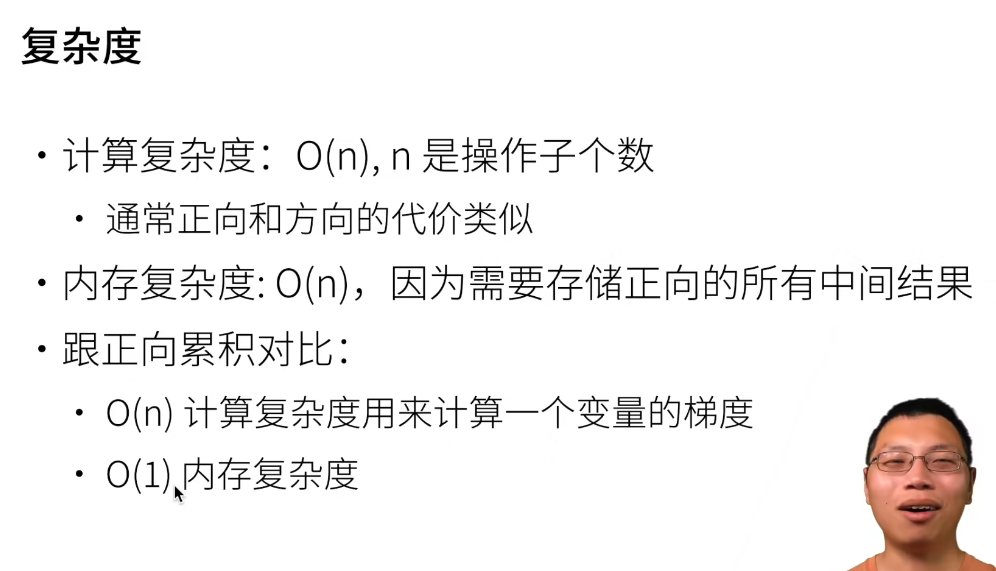

In [2]:
#自动求导的例子
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [3]:
#在计算y关于x的梯度之前 我们需要一个地方存储梯度
#等价于
#x = torch.arange(4.0,requires_grad_ = True)
x.requires_grad_(True)
x.grad #默认为none

In [4]:
y = 2*torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
x.grad == 4*x

tensor([True, True, True, True])

In [8]:
#在默认情况下 pytorch会累积梯度 我们需要清理之前的梯度的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [9]:
x.grad.zero_()
y = x*x
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [15]:
#将计算移动到记录的计算图以外
x.grad.zero_()
y = x*x
u = y.detach()#把y当作一个常数 而不是关于x的变量 u就为x*x
z = u*x
#z就是x*x*x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [17]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

In [18]:
def f(a):
    b = a*2
    while b.norm()<1000:
        b = b*2
    if b.sum() > 0:
        c = b
    else:
        c = 100*b
    return c

a = torch.randn(size = (),requires_grad = True)
d = f(a)
d.backward()

a.grad == d/a

tensor(True)